# Numerical Simulation Laboratory

# Numerical exercise 3 

## Exercise 03.1


Stimare il costo di una *European option* attraverso una simulazione Monte Carlo dell'asset price $S(T)$.

Tale valore è calcolabile ricavando il guadagno in prospettiva al delivery time $T$ e applicando lo sconto:

- **Call-option** $ \quad C\left[ S(t),t \right] = \langle e^{(-rT)}max(0, S(T)-K) \rangle $
- **Put-option**$ \quad P\left[ S(t),t \right] = \langle e^{(-rT)}max(0, K-S(T)) \rangle \$

dove $r$ è l'interesse privo di rischio, $K$ il prezzo di mercato e $T$ il tempo finale della simulazione. Ricavo la stima di Call e Put con una media sui diversi valori simulati per il prezzo $S(T)$, definito da un'equazione differenziale stocastica; questo in effetti è il moto browniano geometrico la soluzione dell'equazione differenziale è
    $$S(t) = S(0) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right] \,,$$
    
dove $W(t)\sim\mathcal{N}(0,t)$ è un numero casuale distribuito normalmente intorno al valore $0$ e con deviazione standard $t$.
    
Effettuo simulazioni Monte Carlo di:

<font color='red'>1)</font> Call e Put calcolando $S(t)$ direttamente dalla soluazione sopra citata

<font color='red'>2)</font> Call e Put calcolando $S(t)$ come cammino discretizzato in $N=100$ passi del GBM

Si calcolano le incertezze attraverso il **data blocking** di un numero grande di simulazioni, e si osservano gli andamenti di Call e Put all'aumentare del numero di blocchi.

Si può poi confrontare il risultato delle simulazioni con la soluzione analitica di Black e Scholes per tempi t<T:
- Call:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- Put:
$$ C\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

dove 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

$$d_2 = d_1 - \sigma\sqrt{T-t}$$

e dove
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
è la funzione cumulativa della gaussiana $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
error function:
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

In entrambe le simulazioni seguenti, diretta e discretizzata, sono stati utilizzati i seguenti valori dei parametri riportati utili:

- Asset price at $t=0$: $S(0)=100$
- Delivery time: $T=1$
- Strike price: $K=100$
- Free risk interest rate: $r=0.1$
- volatility: $\sigma=0.25$

### <font color='blue'> Soluzione di Black e Scholes con questo set di dati:</font>

In [9]:
from scipy.special import erf
import numpy as np

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / np.sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * np.sqrt(T)
    C = S0 * N(d1) - K * np.exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * np.exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", round(call,6))
    print(" put: ", round(put,6))

 == BLACK-SCHOLES ==
call:  14.975791
 put:  5.459533


### <font color='blue'> Simulazione diretta</font>

L'accordo tra simulazione e soluzione analitica sembra essere buono dopo $M=4\cdot 10^6$ calcoli di Call e Put, e sembra convergere al valore esatto aumentando M come ci si aspetterebbe

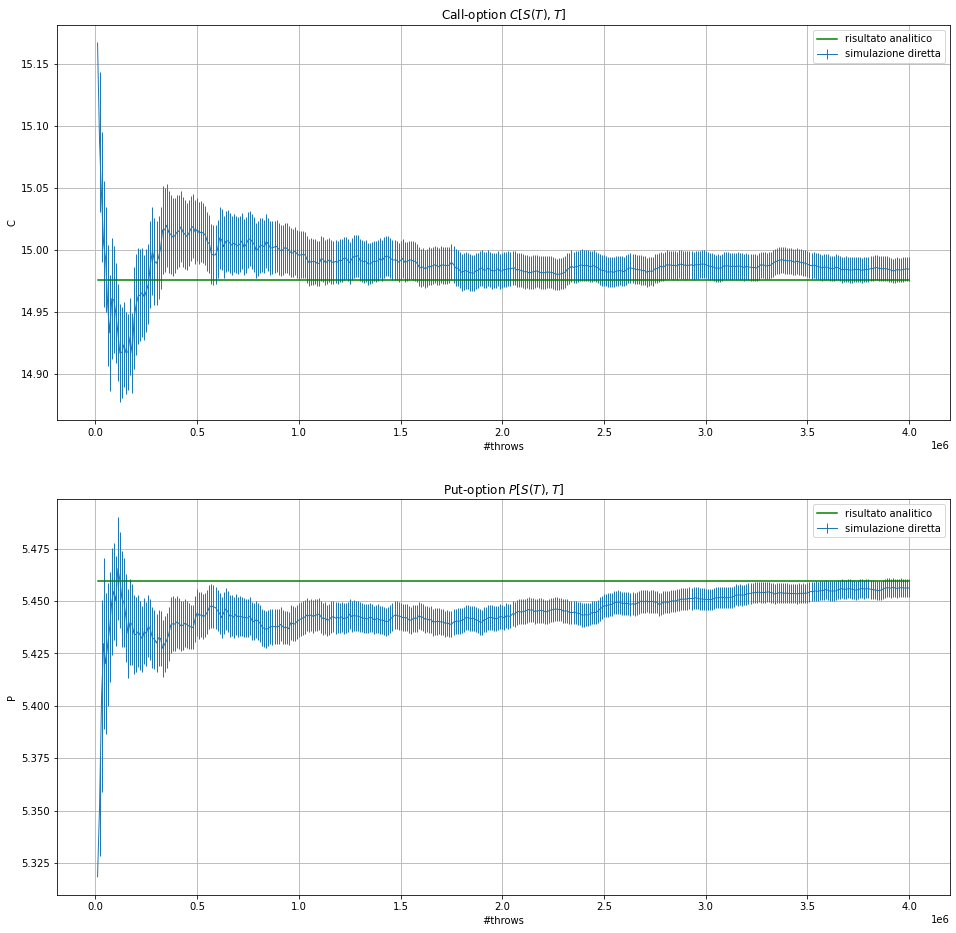

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))

x,y,err= np.loadtxt('./data/directcall.dat', delimiter = ' ', unpack = 'True')

C = call*x**0
P = put*x**0

plt.subplot(211)
plt.plot(x, C, color='green', label='risultato analitico')  #grafico risultato analitico
plt.errorbar(x, y, yerr=err, label='simulazione diretta',lw=1) #grafico simulazione
plt.title("Call-option $C[S(T),T]$")
plt.xlabel('#throws')
plt.ylabel('C')
plt.legend()
plt.grid(True)

x,y,err= np.loadtxt('./data/directput.dat', delimiter = ' ', unpack = 'True')

plt.subplot(212)
plt.plot(x, P, color='green', label='risultato analitico')  #grafico risultato analitico
plt.errorbar(x, y, yerr=err, label='simulazione diretta',lw=1) #grafico simulazione
plt.title("Put-option $P[S(T),T]$")
plt.xlabel('#throws')
plt.ylabel('P')
plt.legend()
plt.grid(True)

plt.show()

### <font color='blue'> Simulazione discretizzata</font>

Calcolo Call e Put nello stesso modo, ma questa volta stimo il prezzo finale $S(T)$ suddividendo l'intervallo temporale $[0,T]$ in $100$ sottointervalli e valutando il prezzo in modo iterativo:

Posso determinare il prezzo degli asset come:
    $$S(t_{i+1}) = S(t_i) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma Z\sqrt{t_{i+1}-t_i}\right] \,,$$
dove $Z \sim \mathcal{N}(0,1)$ è un numero casuale con distribuzione di probabilità standard-normale.

Ancora una volta, l'accordo tra simulazione e soluzione analitica sembra essere consistente dopo $M=4\cdot 10^6$ nonostante la funzione di Put resti distante poco più di una deviazione standard.

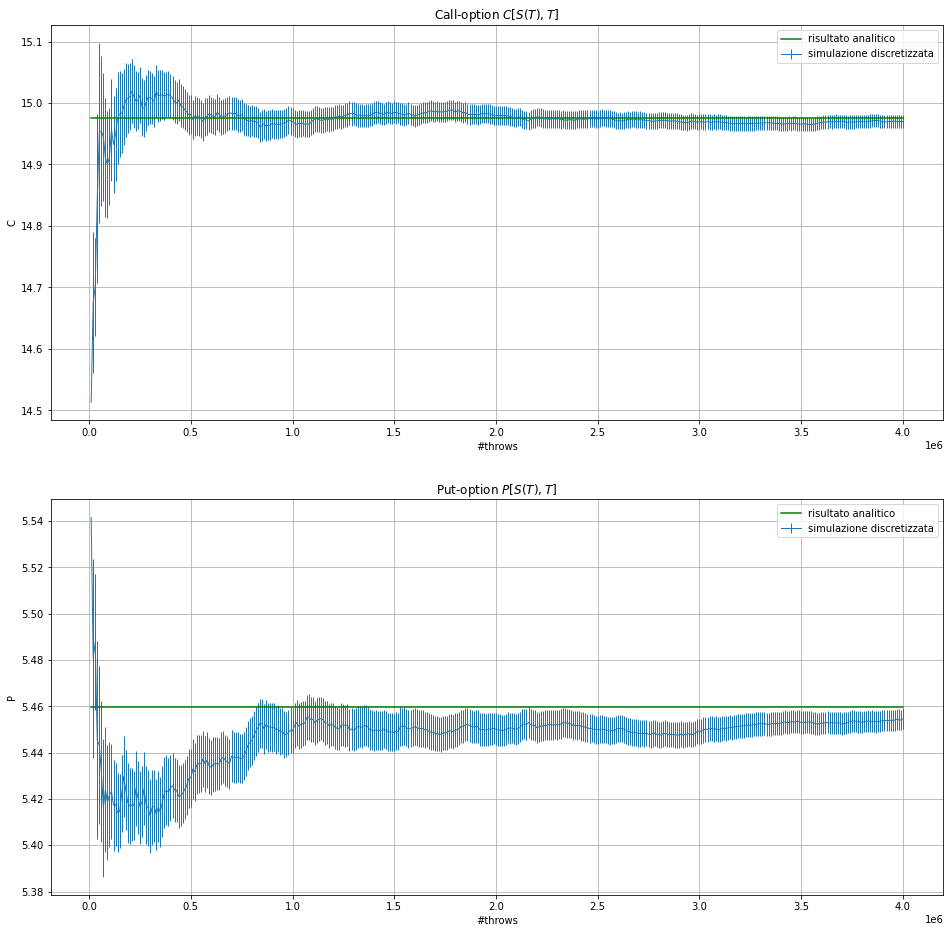

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))

x,y,err= np.loadtxt('./data/stepcall.dat', delimiter = ' ', unpack = 'True')

C = call*x**0
P = put*x**0

plt.subplot(211)
plt.plot(x, C, color='green', label='risultato analitico')  #grafico risultato analitico
plt.errorbar(x, y, yerr=err, label='simulazione discretizzata',lw=1) #grafico simulazione
plt.title("Call-option $C[S(T),T]$")
plt.xlabel('#throws')
plt.ylabel('C')
plt.legend()
plt.grid(True)

x,y,err= np.loadtxt('./data/stepput.dat', delimiter = ' ', unpack = 'True')

plt.subplot(212)
plt.plot(x, P, color='green', label='risultato analitico')  #grafico risultato analitico
plt.errorbar(x, y, yerr=err, label='simulazione discretizzata',lw=1) #grafico simulazione
plt.title("Put-option $P[S(T),T]$")
plt.xlabel('#throws')
plt.ylabel('P')
plt.legend()
plt.grid(True)

plt.show()